In [2]:
%matplotlib notebook

In [3]:
import seaborn as sns
import statistics
from scipy.optimize import curve_fit

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

In [4]:
print(matplotlib.__version__)

2.2.3


In [5]:
sns.set(style='whitegrid')

# Heat diffusion

<font color="red">*Megjegyzés:* új mérés. A méréssel kapcsolatos észrevételek segítik a feladatkitűzés pontosítását.</font>

## 1. Kalibráció szobahőrmérsékleten

A hőmérők pontosságának megállapításához először szobahőmérsékleten mérjük 10 percig a hőmérők által mutatott értékeket.

In [6]:
semmi = np.genfromtxt('semmi.dat')

<IPython.core.display.Javascript object>


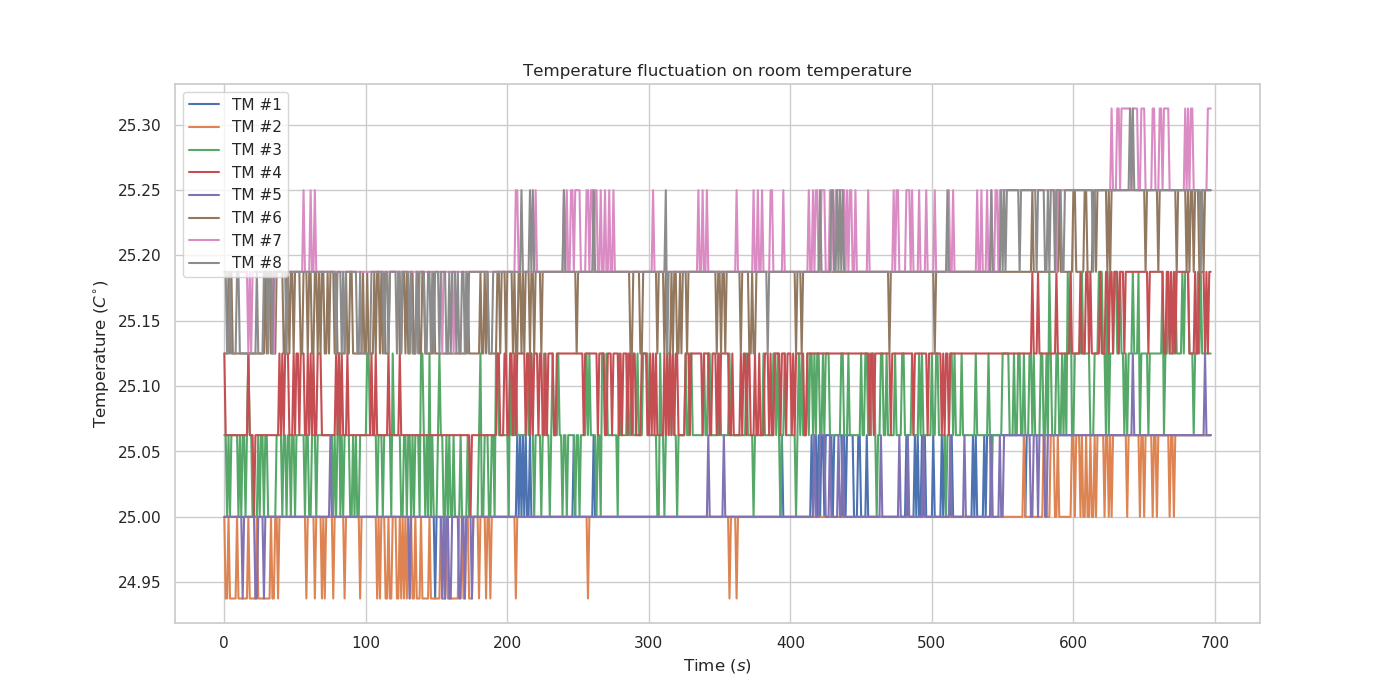

In [184]:
nrows=1
ncols=1
fig_semmi, axes_semmi = plt.subplots(figsize=(14,7))

for i in range(0,8):
    axes_semmi.plot(semmi[0:,0]/1000, semmi[0:,i+1], label="TM #" + str(i+1))
    
axes_semmi.set_xlabel("Time ($s$)")
axes_semmi.set_ylabel("Temperature ($C^{\circ}$)")

axes_semmi.set_title("Temperature fluctuation on room temperature")

plt.legend()
plt.show()

### Dispersion

In [8]:
def DispersionOfData(data_array, bottom_cut, current_thermometer):

    current_disp = statistics.stdev(data_array[bottom_cut:,current_thermometer])

    return current_disp

In [9]:
disps_semmi = {}

for i in range(0,8):
    current_disp_semmi = DispersionOfData(semmi, bottom_cut=100, current_thermometer=i+1)
    disps_semmi["Thermometer #" + str(i+1)] = current_disp_semmi
    
    print("Thermometer #" + str(i+1) + " dispersion:", current_disp_semmi)

Thermometer #1 dispersion: 0.030023664405042137
Thermometer #2 dispersion: 0.029934792798437408
Thermometer #3 dispersion: 0.04301047627718004
Thermometer #4 dispersion: 0.03831781338683194
Thermometer #5 dispersion: 0.029814661986535807
Thermometer #6 dispersion: 0.034417258296770725
Thermometer #7 dispersion: 0.037374594002585394
Thermometer #8 dispersion: 0.03266883409677762


<IPython.core.display.Javascript object>


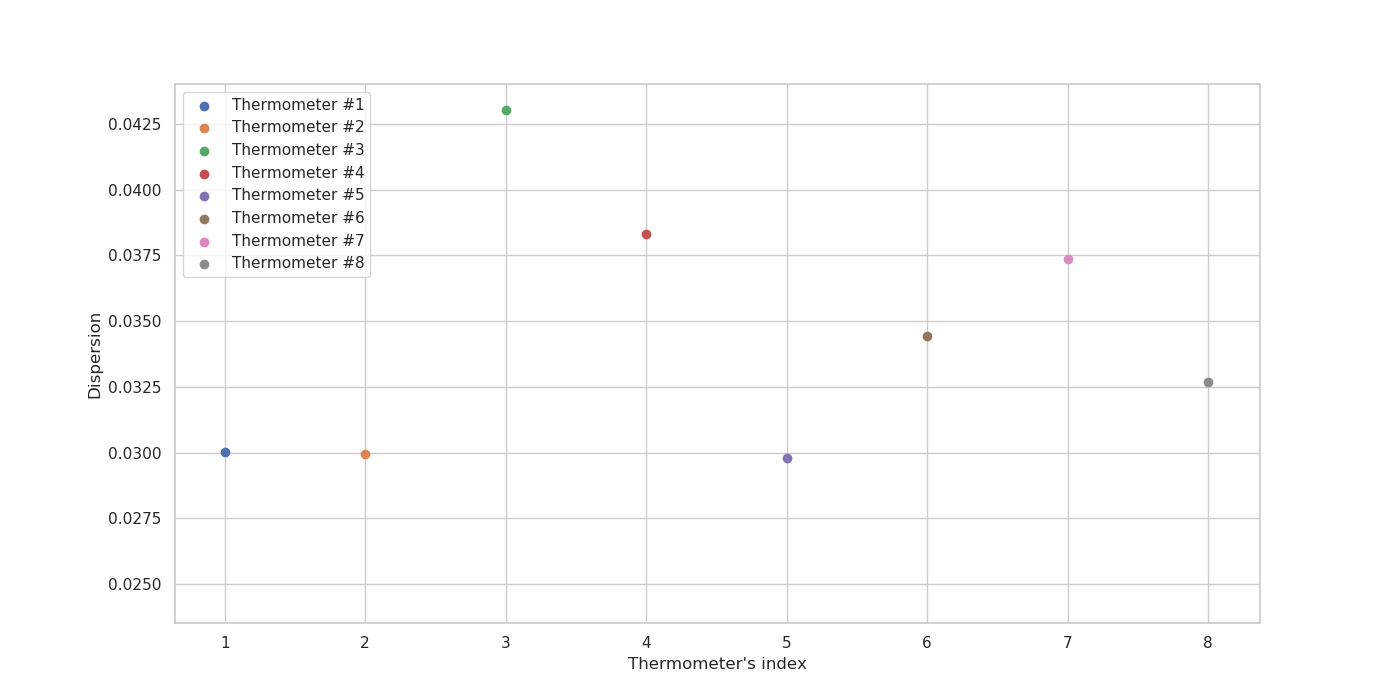

In [10]:
nrows=1
ncols=1
fig_semmi_disp, axes_semmi_disp = plt.subplots(figsize=(14,7))

for i in range(0,8):
    axes_semmi_disp.scatter(i+1 ,disps_semmi["Thermometer #" + str(i+1)], label="Thermometer #" + str(i+1))
    
axes_semmi_disp.set_xlabel("Thermometer's index")
axes_semmi_disp.set_ylabel("Dispersion")
    
plt.legend()
plt.show()

### Errors of thermometers

## 2. Ellentétes peremfeltételekkel rendelkező rendszer viselkedése

A mérésben azt vizsgáljuk, hogy a rézrúd hőmérséklete hogy változik időben, ha az egyik végét elkezdjük melegíteni, míg a másikat ezzel szimután a Peltier-elemek segítségével hűteni.

A páka melegítését és a Peltier-elemek hűtési teljesítményét kb. a maximális értékek felére állítjuk. Ez maximálisan $\approx 90 C^{\circ}$-ot jelent a páka oldalán. Azért nem megyünk ennél feljebb, mert a melegítéshez közeli hőmérők által leadott jel itt már elkezd szaturálódni, valamint a rézrúdhoz történő rögzítésükhöz használt ragasztó is elkezd porladni.

### 2.1 Az adatok ábrázolása

In [11]:
hidegmeleg = np.genfromtxt('meleg_hideg.dat')

In [12]:
bottom_cut = 100
upper_cut = 2500

<IPython.core.display.Javascript object>


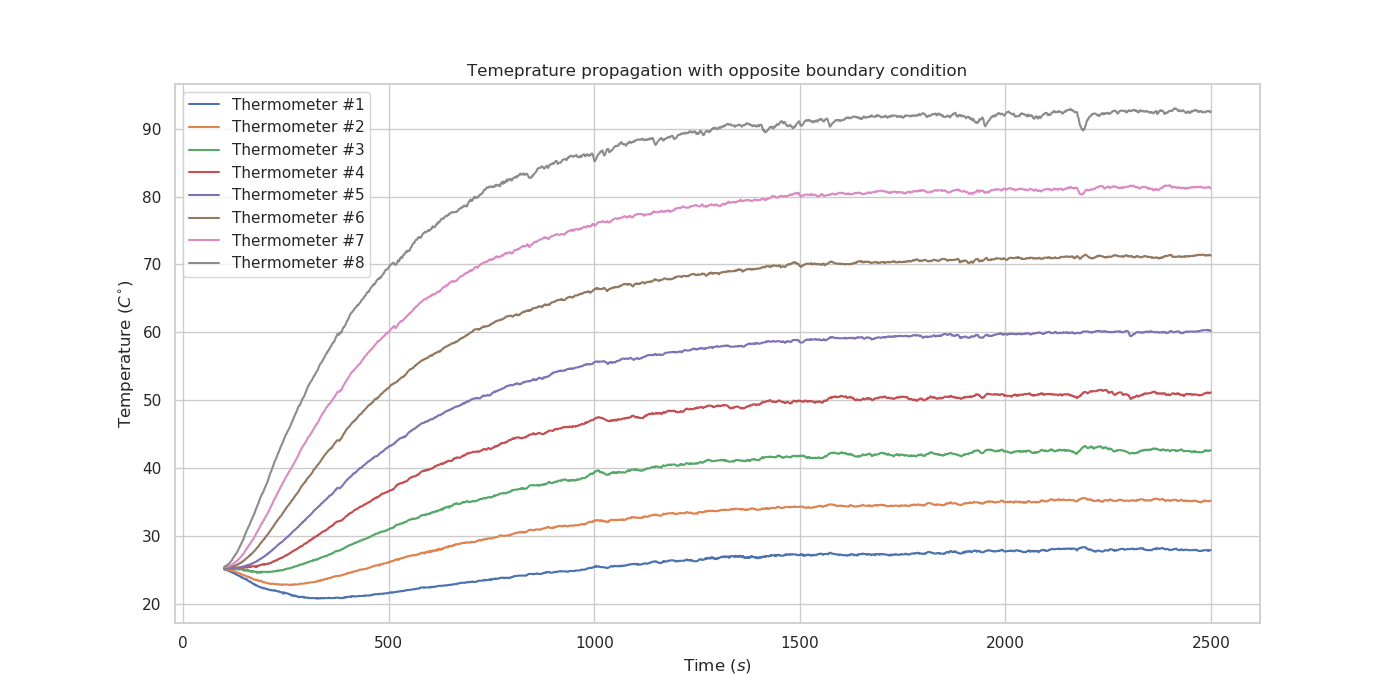

In [13]:
nrows=1
ncols=1
fig_hidegmeleg, axes_hidegmeleg = plt.subplots(figsize=(14,7))

for i in range(0,8):
    axes_hidegmeleg.plot(hidegmeleg[bottom_cut:upper_cut,0]/1000, hidegmeleg[bottom_cut:upper_cut,i+1], label="Thermometer #" + str(i+1))
    
axes_hidegmeleg.set_xlabel("Time ($s$)")
axes_hidegmeleg.set_ylabel("Temperature ($C^{\circ}$)")

axes_hidegmeleg.set_title("Temeprature propagation with opposite boundary condition")

plt.legend()
plt.show()

### 2.2 Az egyes hőmérőkről kapott adatok szórásának összehasonlítása

In [38]:
disps_bound = {}

for i in range(0,8):
    current_disp_bound = DispersionOfData(hidegmeleg, bottom_cut, i+1)
    disps_bound["Thermometer #" + str(i+1)] = current_disp_bound
    
    print("Thermometer #" + str(i+1) + " dispersion:", current_disp_bound)

Thermometer #1 dispersion: 1.9972770494650545
Thermometer #2 dispersion: 3.1827628538515538
Thermometer #3 dispersion: 4.345773179806517
Thermometer #4 dispersion: 5.724639420577826
Thermometer #5 dispersion: 7.222571847875084
Thermometer #6 dispersion: 8.843240110465517
Thermometer #7 dispersion: 10.216579898025467
Thermometer #8 dispersion: 11.516946833035867


<IPython.core.display.Javascript object>


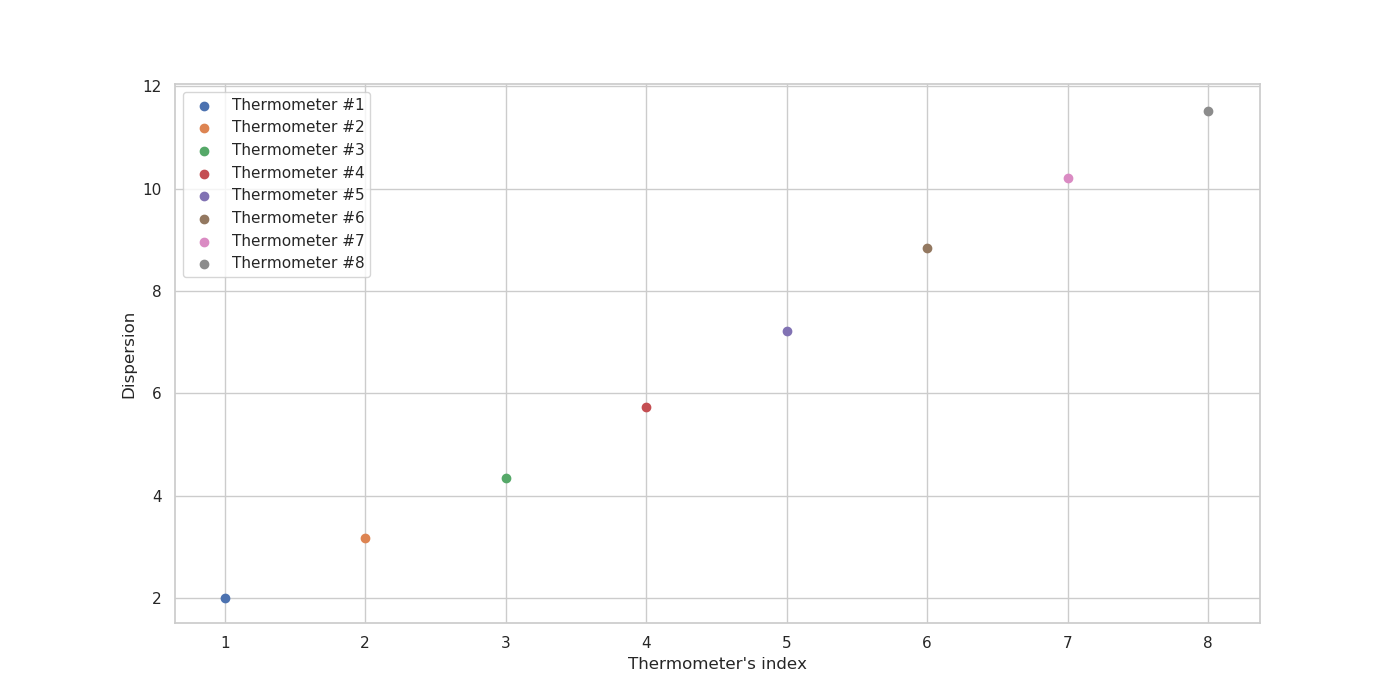

In [39]:
nrows=1
ncols=1
fig_bound_disp, axes_bound_disp = plt.subplots(figsize=(14,7))

for i in range(0,8):
    axes_bound_disp.scatter(i+1, disps_bound["Thermometer #" + str(i+1)], label="Thermometer #" + str(i+1))
    
axes_bound_disp.set_xlabel("Thermometer's index")
axes_bound_disp.set_ylabel("Dispersion")
    
plt.legend()
plt.show()

In [36]:
plottable = 1

<IPython.core.display.Javascript object>


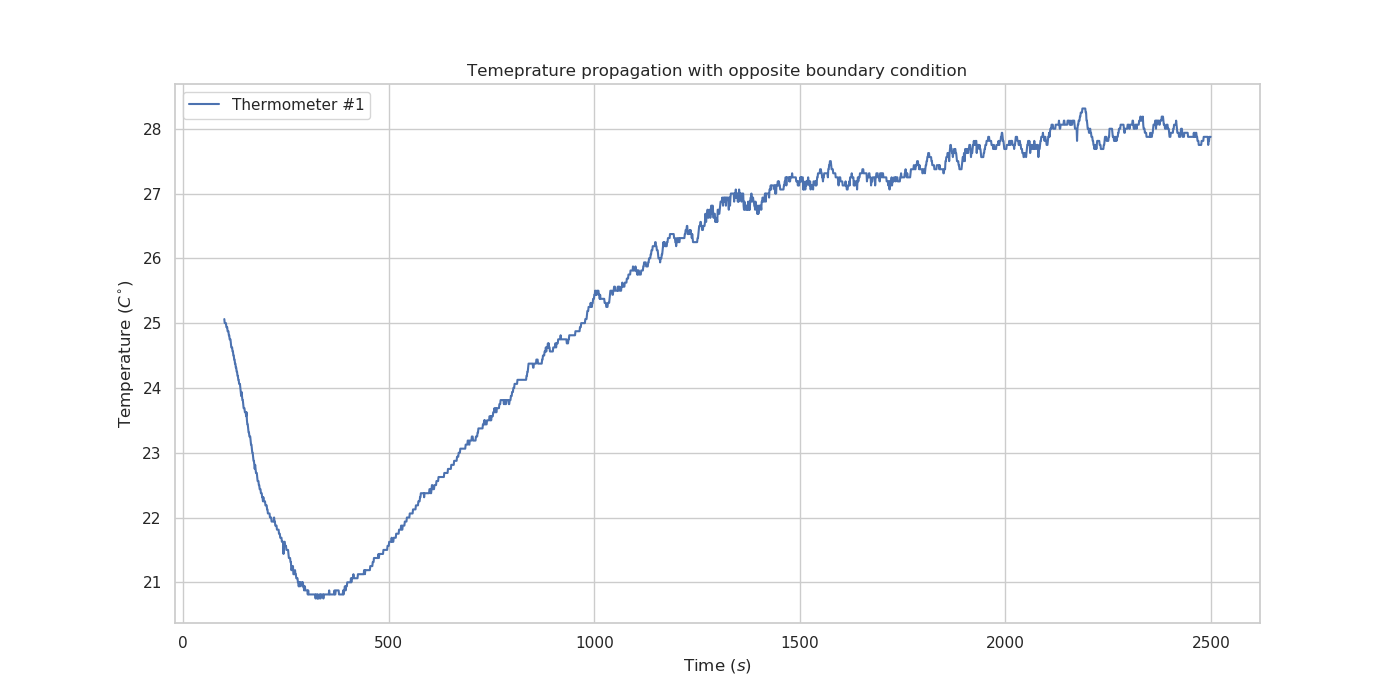

In [36]:
nrows=1
ncols=1
fig_hidegmeleg_one, axes_hidegmeleg_one = plt.subplots(figsize=(14,7))

axes_hidegmeleg_one.plot(hidegmeleg[bottom_cut:upper_cut,0]/1000, hidegmeleg[bottom_cut:upper_cut,plottable], label="Thermometer #" + str(plottable))
    
axes_hidegmeleg_one.set_xlabel("Time ($s$)")
axes_hidegmeleg_one.set_ylabel("Temperature ($C^{\circ}$)")

axes_hidegmeleg_one.set_title("Temeprature propagation with opposite boundary condition")

plt.legend()
plt.show()

In [15]:
def fit_func(t, A, B, C):
    #return A + B * np.e ** (C * t + offset)
    return A + B * np.e ** (C * t)

In [16]:
def value_prep(prep, offset, plottable):
    
    # t = inf: exp(C * t(inf) + offset) = 0
    A = hidegmeleg[-prep:,plottable].mean()

    # t = 0: exp(C * t(0) + offset) = 1
    B = hidegmeleg[offset:offset+prep,plottable].mean() - A
    
    dt = int((len(hidegmeleg[offset:upper_cut,0]) + offset) / 2)
    
    '''print(hidegmeleg[dt:dt+prep,plottable].mean())
    print((hidegmeleg[dt:dt+prep,plottable].mean() - A))
    print((hidegmeleg[dt:dt+prep,plottable].mean() - A)/B)'''
    
    # y = A + B * np.e ** (C * t)
    # C = ln((y - A) / B) / t
    C = np.log((hidegmeleg[dt:dt+prep,plottable].mean() - A) / B) / hidegmeleg[dt:dt+prep,0].mean()
    
    #print("Characteristic time:", (-1/C)/1000, "s")
    
    return A, B, C

In [37]:
offset_test = 450
p0_test = value_prep(prep=5, offset=offset_test, plottable=plottable)
print(p0_test)

x_test = hidegmeleg[bottom_cut:upper_cut,0]
y_test = hidegmeleg[bottom_cut:upper_cut,plottable]
popt_test, pcov_test = curve_fit(fit_func, x_test, y_test, p0=p0_test)
perr_test = np.sqrt(np.diag(pcov_test))

(28.4, -7.212499999999999, -9.998936068684606e-07)


### Legkisebb illesztési hiba keresése

In [18]:
def MinimumErrors(current_tm, offset_max):
    
    perr_currentA = np.empty(offset_max+1)
    perr_currentB = np.empty(offset_max+1)
    perr_currentC = np.empty(offset_max+1)
    
    for offset_index in range(0,offset_max+1):
        offset = offset_index
        p0_current = value_prep(prep=5, offset=offset, plottable=current_tm)

        x_current = hidegmeleg[offset:upper_cut,0]
        y_current = hidegmeleg[offset:upper_cut,i+1]
        popt_current, pcov_current = curve_fit(fit_func, x_current, y_current, p0=p0_current)
        perr_currentA[offset_index], perr_currentB[offset_index], perr_currentC[offset_index] = np.sqrt(np.diag(pcov_current))

    return(perr_currentA, perr_currentB, perr_currentC)

In [19]:
perr_A = {}
perr_B = {}
perr_C = {}

for i in range(0,8):
    perr_A[str(i+1)], perr_B[str(i+1)], perr_C[str(i+1)] = MinimumErrors(current_tm=i+1, offset_max=800)
    #print(i+1, "ok")

In [161]:
def PlotErrors(perr_A, perr_B, perr_C, offset_max):
    
    fig, axes = plt.subplots(figsize=(10,6))
    
    for i in range(0,8):
        axes.plot(np.linspace(0,offset_max,offset_max+1), perr_A[str(i+1)], label='Min error for TM #' + str(i+1) + 'at: ' + 
                                                                 str(int(np.where(perr_A[str(i+1)] == min(perr_A[str(i+1)]))[0])) +
                                                                 ' s')
        #axes.plot(np.linspace(0,offset_max,offset_max+1), perr_B[str(i+1)])
        #axes.plot(np.linspace(0,offset_max,offset_max+1), perr_C[str(i+1)])
        
        axes.set_ylim(0,0.075)

    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


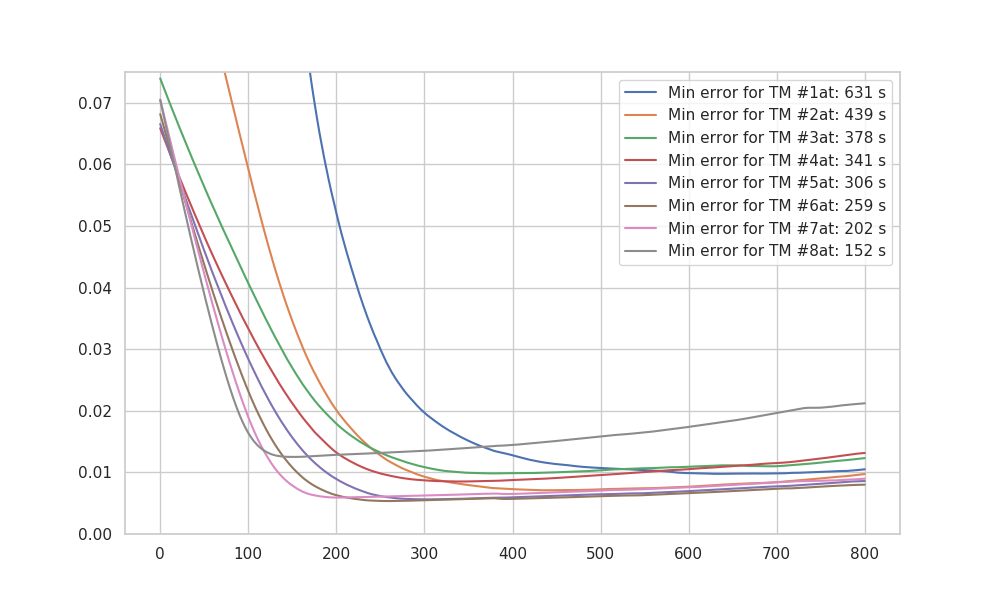

In [162]:
PlotErrors(perr_A, perr_B, perr_C, offset_max=800)

### Melegedési görbék illesztése

In [164]:
p0_arr = {} #np.empty((8,3))
x_arr_fit = {} #np.empty((8,len(hidegmeleg[bottom_cut:upper_cut,0])))
y_arr_fit = {} #np.empty((8,len(hidegmeleg[bottom_cut:upper_cut,i])))
popt_arr = {} #np.empty((8,3))
perr_arr = {} #np.empty((8,3))


for i in range(0,8):
    offset = int(np.where(perr_A[str(i+1)] == min(perr_A[str(i+1)]))[0])
    p0_arr[str(i)] = value_prep(prep=5, offset=offset, plottable=(i+1))

    x_arr_fit[str(i)] = hidegmeleg[offset:upper_cut,0]
    y_arr_fit[str(i)] = hidegmeleg[offset:upper_cut,i+1]
    popt_arr[str(i)], pcov_curr = curve_fit(fit_func, x_arr_fit[str(i)], y_arr_fit[str(i)], p0=p0_arr[str(i)])
    perr_arr[str(i)] = np.sqrt(np.diag(pcov_curr))

In [165]:
p0_arr

{'0': (28.4, -5.762499999999999, -8.206293532072458e-07),
 '1': (35.8, -10.724999999999998, -1.1874683038143135e-06),
 '2': (43.1875, -15.3625, -1.450155941165945e-06),
 '3': (51.3125, -20.625, -1.7097612739561348e-06),
 '4': (60.425, -27.424999999999997, -1.797931303813314e-06),
 '5': (71.9625, -37.050000000000004, -1.8931475126224111e-06),
 '6': (82.2, -49.050000000000004, -2.0917030820870112e-06),
 '7': (92.6875, -62.025, -2.3251377405121056e-06)}

In [166]:
-1.0/(p0_arr['7'][2])/1000

430.08204743162986

### Illesztési paraméterek

| TM # | A       | B        | C           | $\frac{1}{C}\ (\tau)$ (in seconds) |
|------|---------|---------:| -----------:|--------------------------:|
| 1    | 28.4    | -5.7625  | -8.2063e-07 | 1218.57                   |
| 2    | 35.8    | -10.725  | -1.1875e-06 | 842.13                    |
| 3    | 43.1875 | -15.3625 | -1.4502e-06 | 689.58                    |
| 4    | 51.3125 | -20.625  | -1.7098e-06 | 584.88                    |
| 5    | 60.425  | -27.425  | -1.7979e-06 | 556.19                    |
| 6    | 71.9625 | -37.05   | -1.8931e-06 | 528.22                    |
| 7    | 82.2    | -49.05   | -2.0917e-06 | 478.08                    |
| 8    | 92.6875 | -62.025  | -2.3251e-06 | 430.08                    |

<IPython.core.display.Javascript object>


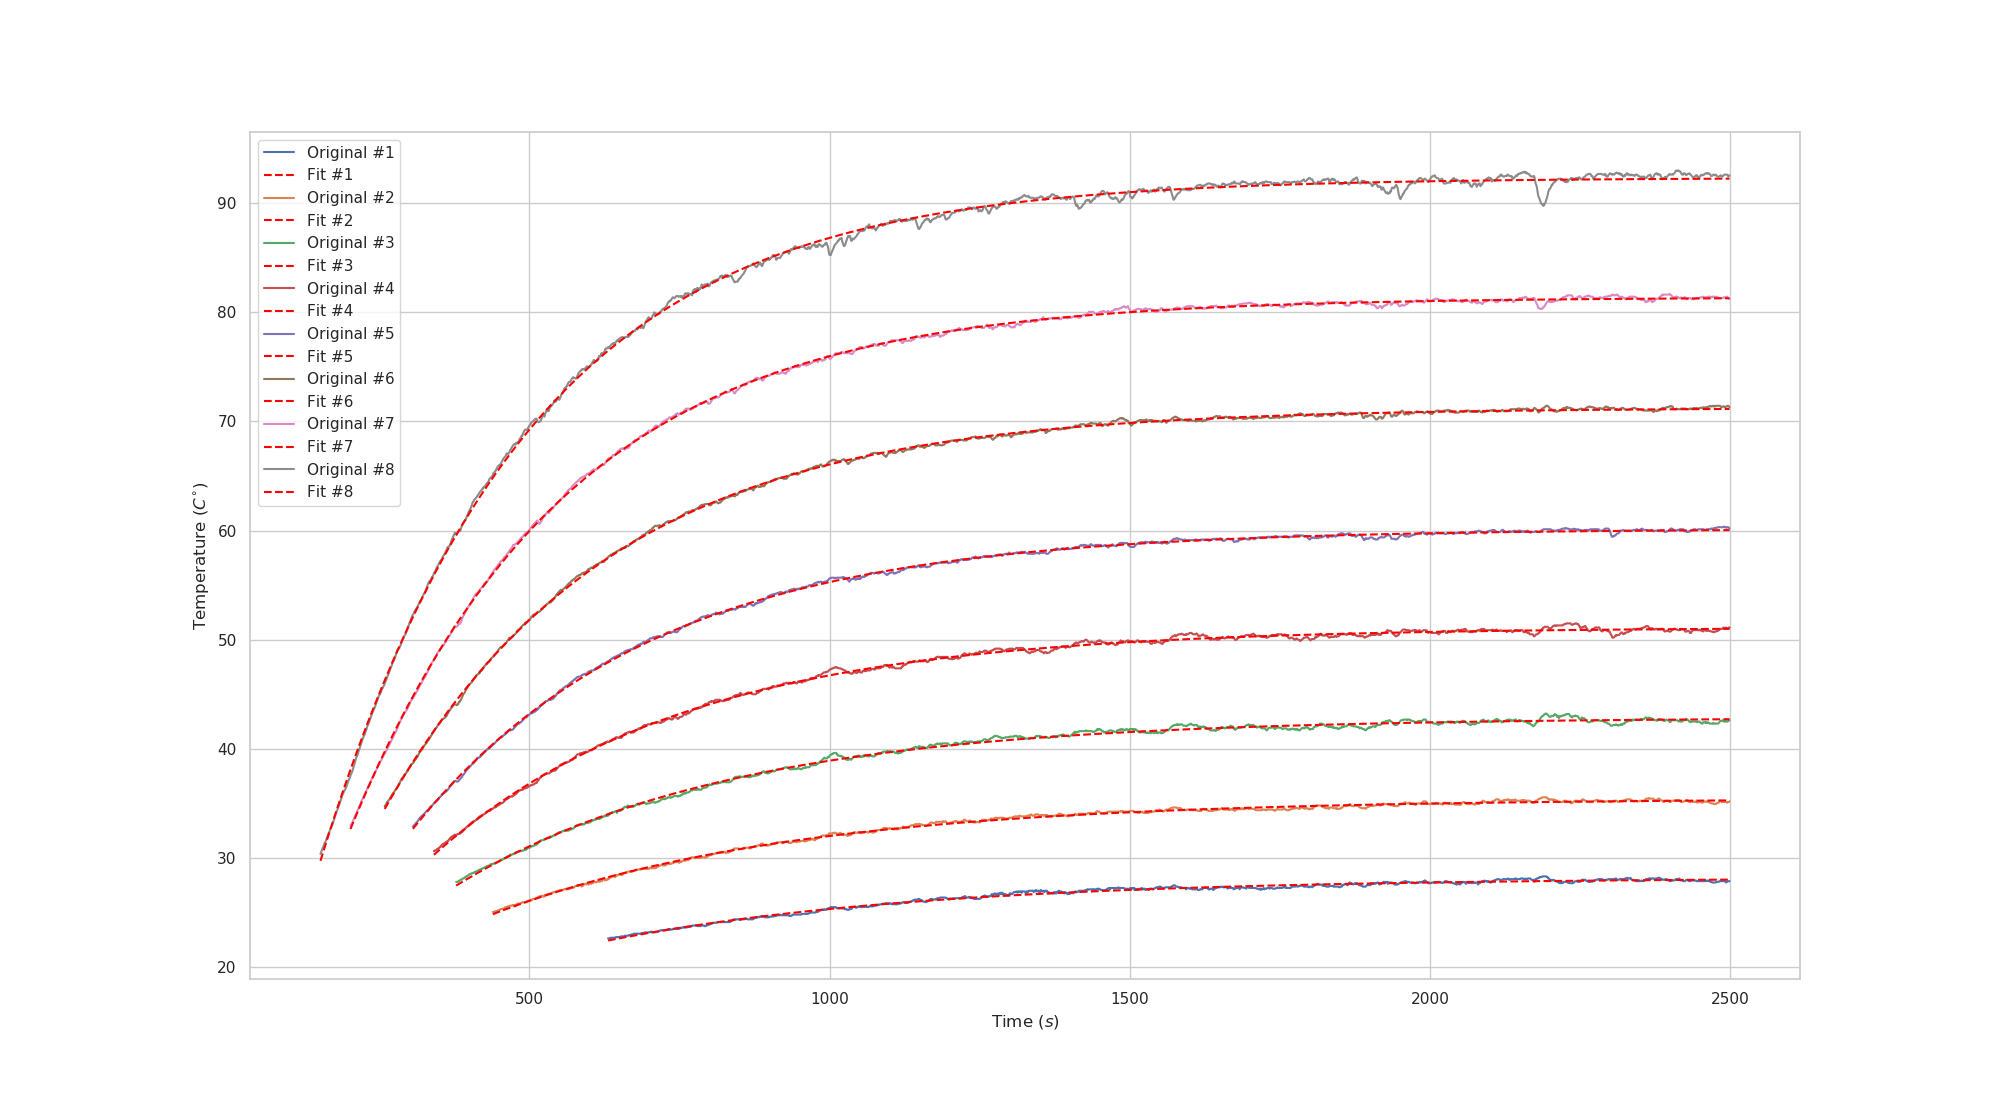

In [168]:
nrows=1
ncols=1
fig_fit, axes_fit = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,11))

for i in range(0,8):
    axes_fit.plot(x_arr_fit[str(i)]/1000, y_arr_fit[str(i)], label='Original #' + str(i+1))
    axes_fit.plot(x_arr_fit[str(i)]/1000, fit_func(x_arr_fit[str(i)], *popt_arr[str(i)]), c='red', linestyle='--', label='Fit #' + str(i+1))

axes_fit.set_xlabel("Time ($s$)")
axes_fit.set_ylabel("Temperature ($C^{\circ}$)")


plt.legend()
plt.show()

<IPython.core.display.Javascript object>


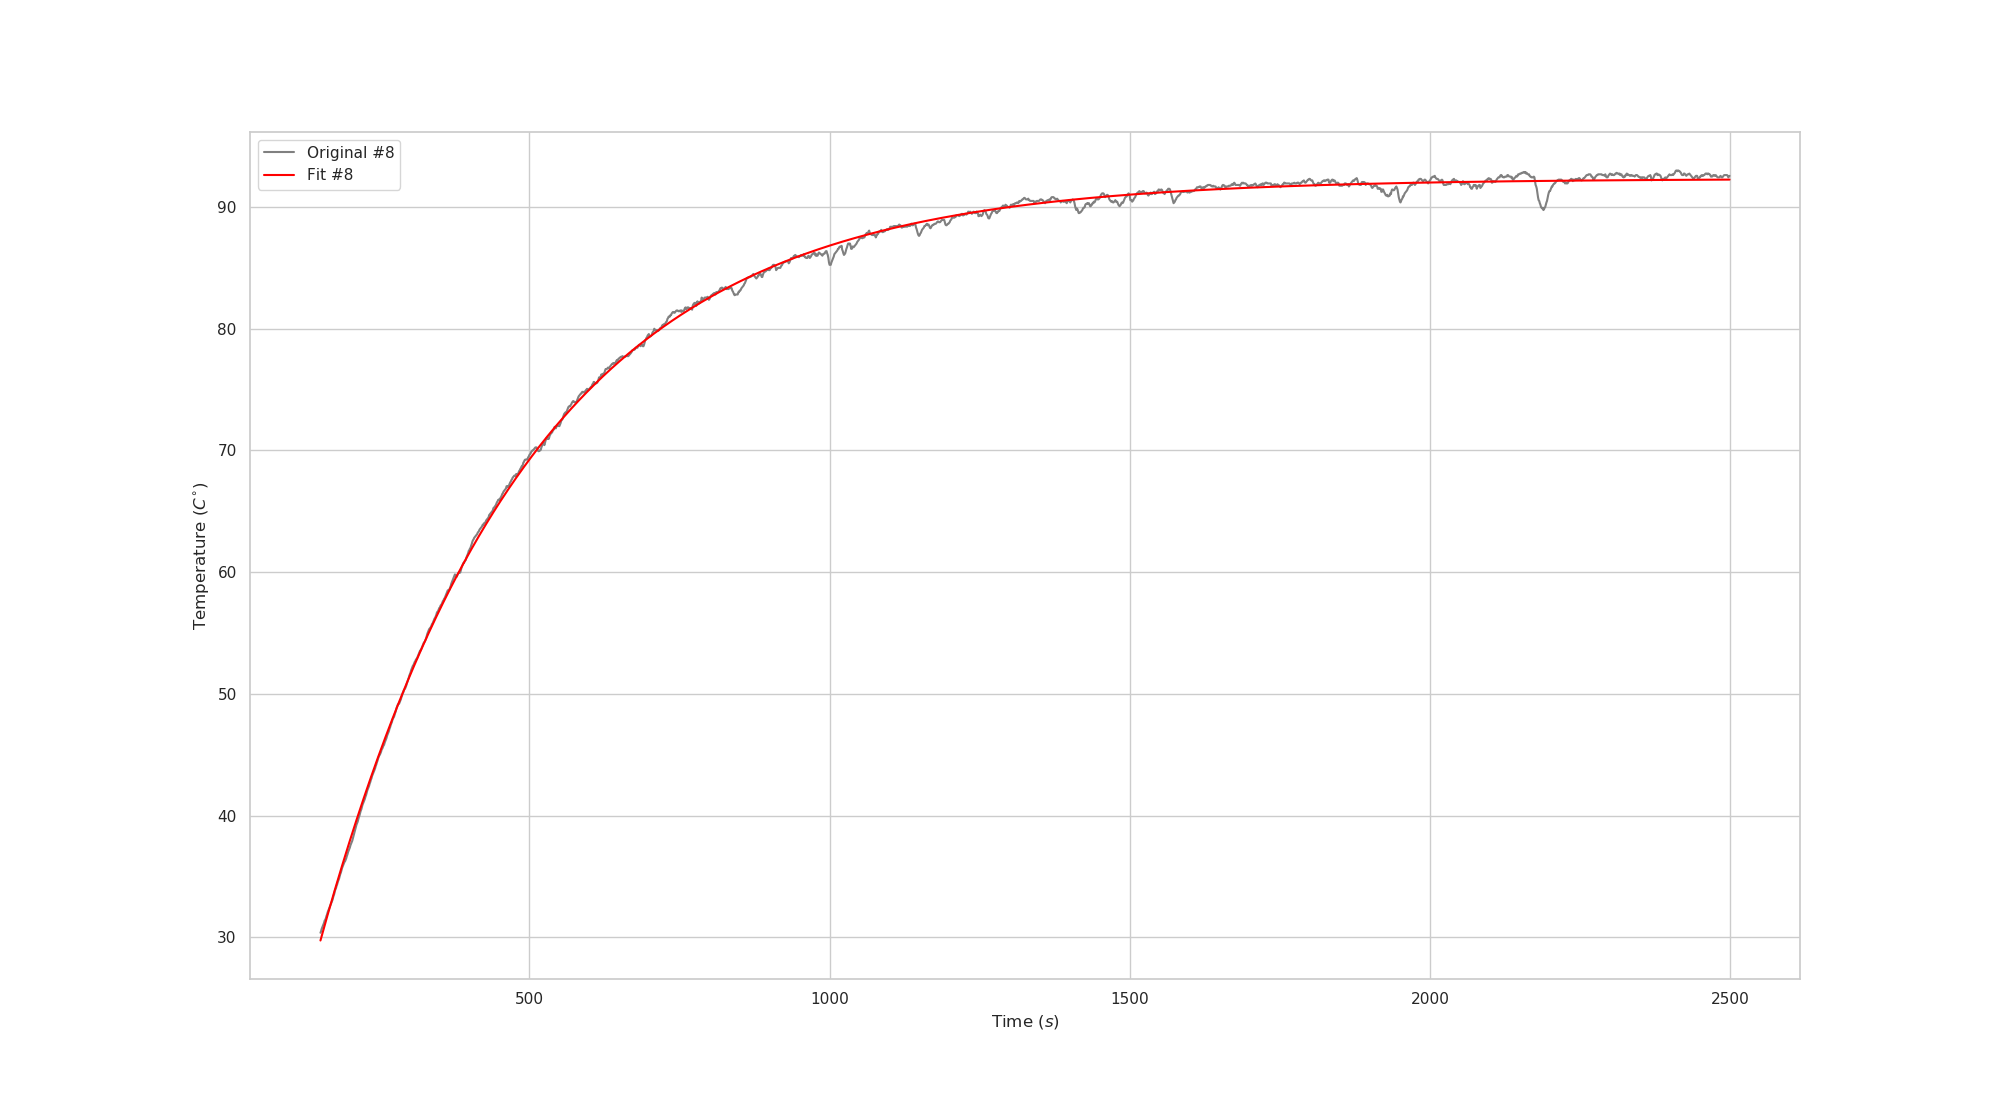

In [170]:
nrows=1
ncols=1
fig_fit_one, axes_fit_one = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,11))

plotting = 8

axes_fit_one.plot(x_arr_fit[str(plotting-1)]/1000, y_arr_fit[str(plotting-1)], c='grey', label='Original #' + str(plotting))
axes_fit_one.plot(x_arr_fit[str(plotting-1)]/1000, fit_func(x_arr_fit[str(plotting-1)], *popt_arr[str(plotting-1)]), c='red', label='Fit #' + str(plotting))

axes_fit_one.set_xlabel("Time ($s$)")
axes_fit_one.set_ylabel("Temperature ($C^{\circ}$)")

plt.legend()
plt.show()

### A hőmérséklet $u(x,t)$ függése - animáció

In [181]:
x_arr_hg = np.linspace(1,8,8)

<IPython.core.display.Javascript object>


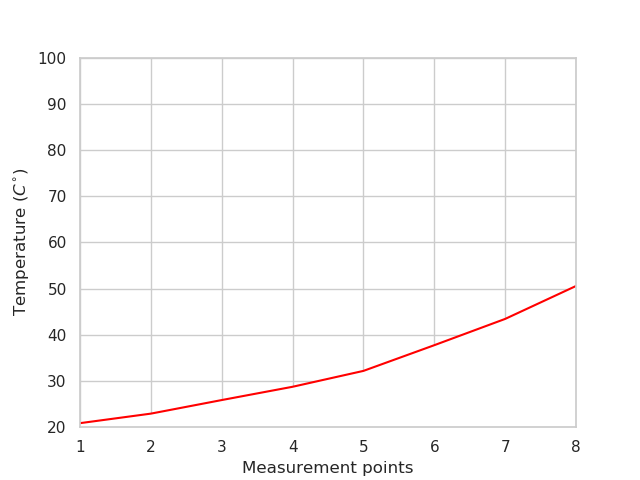

In [171]:
nrows=1
ncols=1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)

'''wavelengths = np.linspace(1, 8, 1000)'''

for i in range(0,8):
    y_arr[i] = hidegmeleg[bottom_cut, i+1]

line, = axes.plot([], [], c='red')

axes.set_xlim(1,8)
axes.set_ylim(20,100)

axes.set_xlabel("Measurement points")
axes.set_ylabel("Temperature ($C^{\circ}$)")


def animate(current_time):

    x_arr_hg = np.linspace(1,8,8)
    y_arr = np.empty(8)
    
    for i in range(0,8):
        y_arr[i] = hidegmeleg[current_time, i+1]

    # Clear fill_between canvas
    axes.collections.clear()
    
    line.set_data(x_arr_hg, y_arr)
    
    '''X,Y = np.meshgrid(wavelengths, y_arr)
    extent=(np.min(wavelengths), np.max(wavelengths), np.min(y_arr), np.max(y_arr))
    axes.imshow(X, clim=(min(wavelengths), max(wavelengths)),  extent=extent, cmap=plt.get_cmap('jet'), aspect='auto')'''
    
    axes.fill_between(x_arr_hg, y_arr, 8, color='w')

    return line,

steps = [i for i in range(bottom_cut, upper_cut+1)]
anim = FuncAnimation(fig=fig, func=animate, init_func=init_func, frames=steps, interval=20, blit=False, repeat=True)

plt.show()

## 3. A rendszer egyik végének rángatása, a fent meghatározott karakterisztikus időkkel összemérhető nagyságú idő szerint ($=400\ s$)

In [33]:
gerj = np.genfromtxt('hullam.dat')

<IPython.core.display.Javascript object>


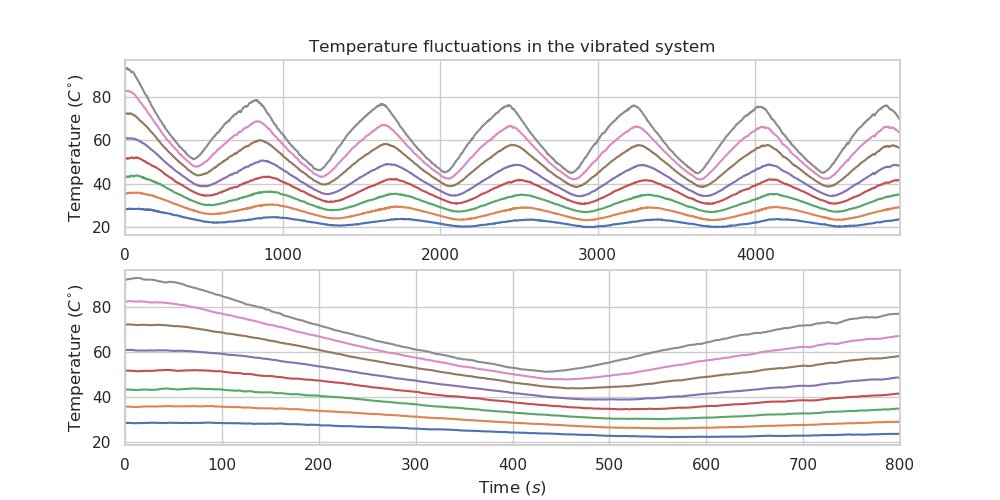

In [173]:
nrows=2
ncols=1
fig_gerj, axes_gerj = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,5))

min_lim_gerj = 0
max_lim_gerj = 800

for i in range(0,8):
    axes_gerj[0].plot(gerj[:,0]/1000, gerj[:,i+1], label="Thermometer #" + str(i+1))
    axes_gerj[1].plot(gerj[min_lim_gerj:max_lim_gerj,0]/1000, gerj[min_lim_gerj:max_lim_gerj,i+1], label="Thermometer #" + str(i+1))

axes_gerj[0].set_xlim(min(gerj[:,0]/1000), max(gerj[:,0]/1000))
axes_gerj[1].set_xlim(min_lim_gerj, max_lim_gerj)
    
axes_gerj[0].set_ylabel("Temperature ($C^{\circ}$)")

axes_gerj[1].set_xlabel("Time ($s$)")
axes_gerj[1].set_ylabel("Temperature ($C^{\circ}$)")

axes_gerj[0].set_title("Temperature fluctuations in the vibrated system")

#plt.legend()
plt.show()

### Hőmérsékletcsökkenés - lineáris "illesztés"

In [133]:
def TempDrop():
    
    temp_drop_data = {}
    tempdrop_speed = np.empty(8)
    
    for i in range(0,8):
        
        min_time = np.median(np.where(gerj[min_lim_gerj:max_lim_gerj,i+1] == min(gerj[min_lim_gerj:max_lim_gerj,i+1]))[0])
        max_time = np.median(np.where(gerj[min_lim_gerj:max_lim_gerj,i+1] == max(gerj[min_lim_gerj:max_lim_gerj,i+1]))[0])
        
        temp_drop = max(gerj[min_lim_gerj:max_lim_gerj,i+1]) - min(gerj[min_lim_gerj:max_lim_gerj,i+1])
        
        temp_drop_data[str(i+1)] = [min_time, max_time, temp_drop]
        
        tempdrop_speed[i] = temp_drop_data[str(i+1)][2] / (temp_drop_data[str(i+1)][0] - temp_drop_data[str(i+1)][1])
        
    return temp_drop_data, tempdrop_speed

In [134]:
temp_drop_data, tempdrop_speed = TempDrop()

In [145]:
temp_drop_data

{'1': [568.0, 85.0, 6.4375],
 '2': [557.0, 84.5, 9.875],
 '3': [552.5, 71.5, 13.625],
 '4': [511.0, 43.5, 17.5625],
 '5': [519.0, 4.0, 22.1875],
 '6': [466.0, 3.0, 28.5],
 '7': [455.5, 5.0, 34.875],
 '8': [435.0, 12.5, 41.875]}

<IPython.core.display.Javascript object>


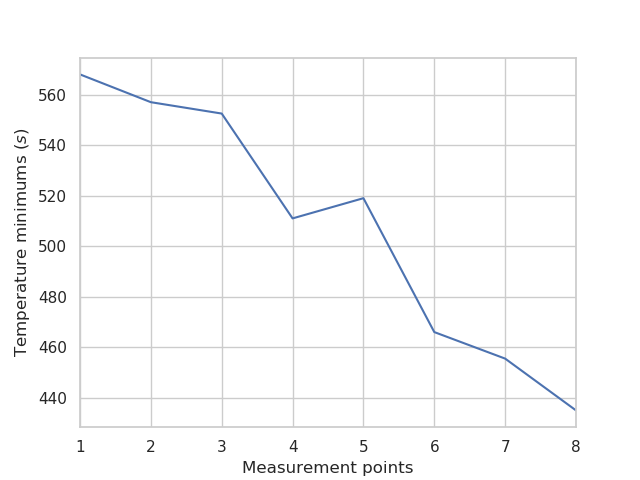

In [153]:
figtest, axestest = plt.subplots()

x = np.linspace(1,8,8)
y = np.empty(8)

axestest.set_xlim(1,8)

axestest.set_xlabel("Measurement points")
axestest.set_ylabel("Temperature minimums ($s$)")

for i in range(0,8):
    
    y[i] = temp_drop_data[str(i+1)][0]

axestest.plot(x,y)

plt.show()

In [139]:
for i in range(0,8):
    
    print("Temperature drop \"speed\" for TM #" + str(i+1) + ":", tempdrop_speed[i], "C°/s")

Temperature drop "speed" for TM #1: 0.01332815734989648 C°/s
Temperature drop "speed" for TM #2: 0.0208994708994709 C°/s
Temperature drop "speed" for TM #3: 0.028326403326403328 C°/s
Temperature drop "speed" for TM #4: 0.037566844919786097 C°/s
Temperature drop "speed" for TM #5: 0.04308252427184466 C°/s
Temperature drop "speed" for TM #6: 0.061555075593952485 C°/s
Temperature drop "speed" for TM #7: 0.07741398446170922 C°/s
Temperature drop "speed" for TM #8: 0.09911242603550297 C°/s


### Heat equation

Generally in 3 dimension, the heat equation states the following:

$$
\frac{\partial u}{\partial t}
-
\alpha \left(
\frac{\partial^{2} u}{\partial x^{2}}
+
\frac{\partial^{2} u}{\partial y^{2}}
+
\frac{\partial^{2} u}{\partial z^{2}}
\right) = 0
$$

In our measurement, we treat the copper rod as a 1D system, so the heat equation simplifies in the form as follows:

$$
\frac{\partial u}{\partial t}
-
\alpha \left(
\frac{\partial^{2} u}{\partial x^{2}}
\right) = 0
$$

The solution for this equation:

$$
u \left( x,t \right) =
\sum\limits_{n = 1}^\infty
B_{n}
\cdot
\sin{\left( \frac{n \pi x}{L} \right)}
\cdot
{e}^{{- k \left( \tfrac{n \pi}{L} \right)}^{2}} \cdot t
$$

This solution will satisfy any initial condition that can be written in the form:

$$
u \left( x,0 \right)
=
\sum\limits_{n = 1}^{M} {B_n}
\cdot
\sin{\left( \frac{n \pi x}{L} \right)}
$$

Thus $B_{n}$ could be calculated as follows:

$$
B_{n}
=
\frac{2}{L} \int_{\ 0}^{\ L} u \left( x,0 \right)
\cdot
\sin{\left( \frac{n \pi x}{L} \right)}\ dx
\quad
\text{n} = 1,2,3, \ldots
$$

### Fourier sor - Jelfeldolg. gyakorlatról

In [26]:
def FourierCoeff(signal, t, Complex=True):
    
    '''
    Parameters
    ----------
    signal : the periodic function's value as an np.array
    t: an np.linsapce array of points of time, where the signal got evalueted

    Returns
    -------
    if Complex == False, the function returns:

    a_0 : float
    a, b : np.float arrays describing respectively the cosine and sine coefficients

    =======
    if Complex == True, the function returns:

    c : 1-dimensional complex-valued np.array of size N+1
    '''

    # This function computes the one-dimensional n-point discrete Fourier Transform (DFT) 
    # of a real-valued array by means of an efficient algorithm called the Fast Fourier Transform (FFT)
    y = np.fft.rfft(signal) / t.size

    if(Complex):
        return(y)

    else:
        y *= 2
        return(y[0].real, y[1:-1].real, -y[1:-1].imag)

In [27]:
def FourierCalcComplex(c, t, N_max):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    ReconstTime = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array to store the reconstructed function's values
    ReconstFunc = np.empty(SampRate, dtype=np.complex_)
    
    # Calculate f(t) values by f(t) ~= {Sum}_k=-N->N (c_k*e^(i*2*pi*kt/T))
    for dt in range(0,len(ReconstTime)):
        ReconstFunc[dt] = 0
        
        for k in range(0,N_max+1):
            ReconstFunc[dt] += c[k] * cmath.exp(1.0j * 2 * np.pi * k * ReconstTime[dt] / t)
        
        for k in range(1,N_max+1):
            ReconstFunc[dt] += np.conj(c[k]) * cmath.exp(1.0j * 2 * np.pi * (-k) * ReconstTime[dt] / t)

    return(ReconstFunc, ReconstTime)

### A hőmérséklet $u(x,t)$ függése - animáció

<IPython.core.display.Javascript object>


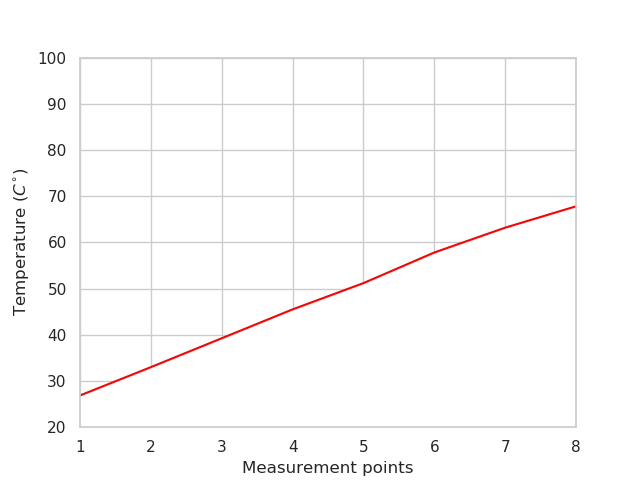

In [180]:
nrows=1
ncols=1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)

line, = axes.plot([], [], c='red')

axes.set_xlim(1,8)
axes.set_ylim(20,100)

axes.set_xlabel("Measurement points")
axes.set_ylabel("Temperature ($C^{\circ}$)")


def init_func():

    line.set_data([], [])
    return line,

def animate(current_time):
    
    for i in range(0,8):
        y_arr_gerj[i] = gerj[current_time, i+1]

    # Clear fill_between canvas
    axes.collections.clear()
        
    line.set_data(x_arr_hg, y_arr_gerj)
    
    axes.fill_between(x_arr_hg, y_arr_gerj, 8, color='w')

    return line,

steps = [i for i in range(bottom_cut, upper_cut+1)]
anim = FuncAnimation(fig=fig, func=animate, init_func=init_func, frames=steps, interval=20, blit=True, repeat=True)

plt.show()

## Összehasonlítás

### A hőmérséklet $u(x,t)$ függése - animáció

<IPython.core.display.Javascript object>


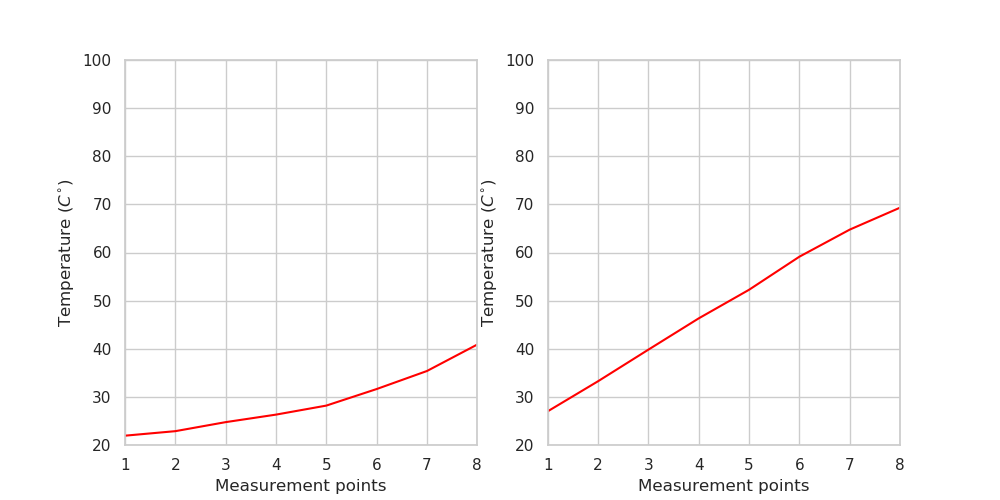

In [183]:
y_arr_1 = np.empty(8)
y_arr_2 = np.empty(8)

nrows=1
ncols=2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,5))

line_1, = axes[0].plot([], [], c='red')
line_2, = axes[1].plot([], [], c='red')


axes[0].set_xlim(1,8)
axes[0].set_ylim(20,100)

axes[1].set_xlim(1,8)
axes[1].set_ylim(20,100)

axes[0].set_xlabel("Measurement points")
axes[0].set_ylabel("Temperature ($C^{\circ}$)")
axes[1].set_xlabel("Measurement points")
axes[1].set_ylabel("Temperature ($C^{\circ}$)")

def init_func():

    line_1.set_data([], [])
    line_2.set_data([], [])
    return line_1, line_2,

def animate(current_time):
    
    for i in range(0,8):
        y_arr_1[i] = hidegmeleg[current_time, i+1]
        y_arr_2[i] = gerj[current_time, i+1]

    line_1.set_data(x_arr_hg, y_arr_1)
    line_2.set_data(x_arr_hg, y_arr_2)

    return line_1, line_2,

steps = [i for i in range(bottom_cut, upper_cut+1)]
anim = FuncAnimation(fig=fig, func=animate, init_func=init_func, frames=steps, interval=20, blit=False, repeat=True)

plt.show()

### TEST

<IPython.core.display.Javascript object>


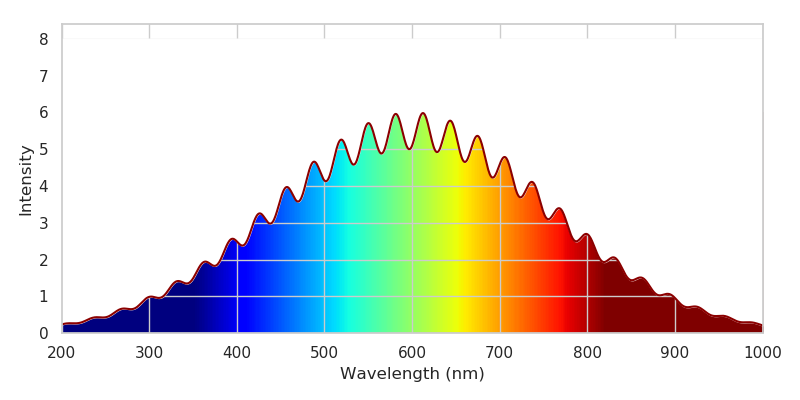

In [178]:
fig, axs = plt.subplots(1, 1, figsize=(8,4), tight_layout=True)

wavelengths = np.linspace(200, 1000, 1000)
spectrum = (5 + np.sin(wavelengths*0.1)**2) * np.exp(-0.00002*(wavelengths-600)**2)
plt.plot(wavelengths, spectrum, color='darkred')

y = np.linspace(0, max(spectrum), 100)
X,Y = np.meshgrid(wavelengths, y)
extent=(np.min(wavelengths), np.max(wavelengths), np.min(y), np.max(y))

plt.imshow(X, clim=(350,820),  extent=extent, cmap=plt.get_cmap('jet'), aspect='auto')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')

plt.fill_between(wavelengths, spectrum, 8, color='w')

plt.show()

## A méréssel kapcsolatos észrevételek

__Kitölteni nem kötelező__: 
* Itt kérjük feltűntetni, hogy mennyi idő volt szükséges a feladatok elvégzéséhez. 
* Itt lehet javaslatot tenni a méréssel kapcsolatban.
* A méréssel kapcsolatban felmerült további ötletek.